# Hands-On Overview

This notebook is a detailed step-by-step walkthrough of a Machine Learning application with realistic data, with full code examples.

In this notebook we'll be creating a model to perform classification in order to determine the survival outcome of a passenger onboard the Titanic. This dataset is from Kaggle.

Let's get started!

# Scikit-Learn

#### Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use.
<br>
The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.<br>

# Pandas
#### Data structures and analysis

# Matplotlib
#### Comprehensive 2D/3D plotting

# Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [40]:
import warnings
warnings.filterwarnings('ignore')

# Load the Titanic Dataset
It is in the same folder with a name 'titanic.csv'

We load this csv file using Pandas.

The following is summary of each column.

- Survived is the outcome, 0 or 1
- Pclass is the class the passenger was in, 1st class, 2nd, 3rd
- Name of passenger, sex of passenger
- Age (should convert to int)
- SibSp the number of siblings / spouses abord the ship
- Parch the number of parents / children aboard
- Ticket
- Fare is how much they paid for the ticket
- Cabin if it is known, there are a number of NaN
- Embarked is the port where they embarked on the ship

In [41]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As you can see there are a lot of different attributes describing the passengers onboard the Titanic, the column that we are trying to predict with our model is "Survived". 

We want to know if there any intrinsic features in this data that might be indicative of whether or not a passenger survived and that can be provided to our model.


# Data Preprocessing and Analysis

This step is to analyze the data and look for errors. All of these errors will need to be corrected in the data before we can proceed.

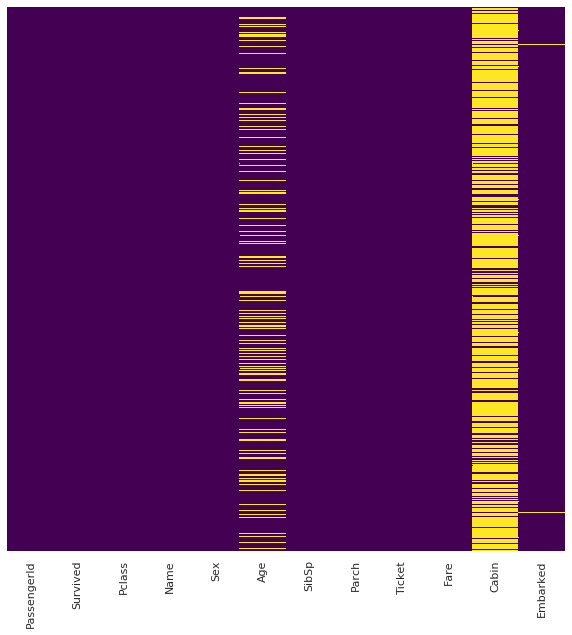

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

From this diagram we can see that there is some data missing for the Age column, most of the data is missing for the cabin, and there appears to be a small amount of missing data for Embarked.

### Lets see some relationship between different labels with target label 'Survived'

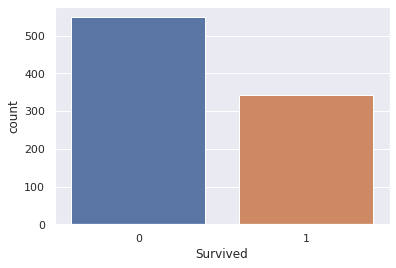

In [43]:
sns.countplot(x='Survived', data=titanic, palette=None)

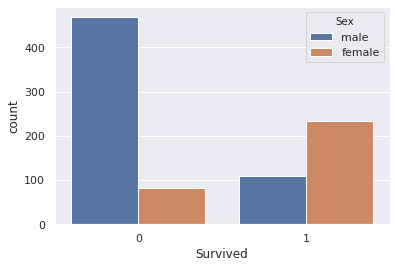

In [44]:
sns.countplot(x='Survived', hue='Sex' , data=titanic, palette=None)

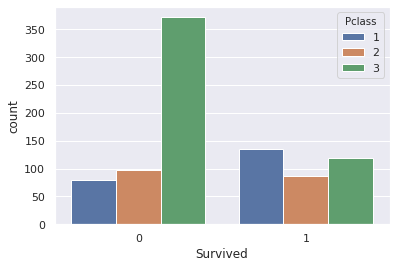

In [45]:
sns.countplot(x='Survived',hue='Pclass' , data=titanic, palette=None)

# Data Cleaning

In [46]:
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [47]:
def change_age(cols):
    age_map = [38, 30, 25]
    age, pclass = cols[0], cols[1]
    if pd.isnull(age):
        return age_map[int(pclass - 1)]
    else:
        return age

In [48]:
titanic['Age'] = titanic[['Age','Pclass']].apply(change_age, axis=1)

In [49]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.dropna(inplace=True)

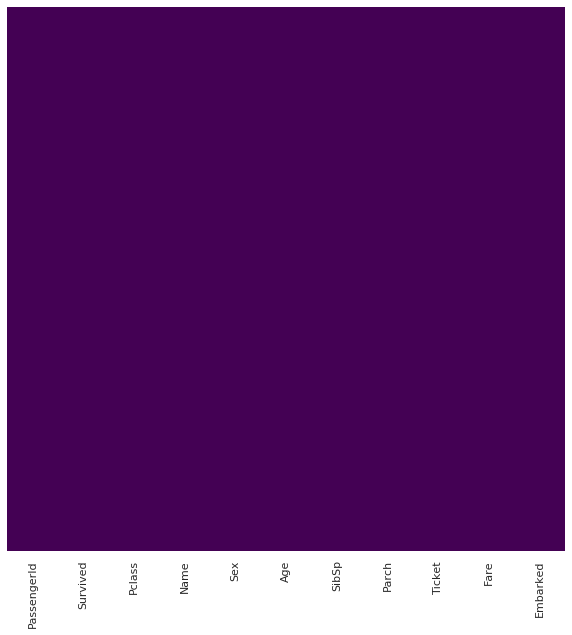

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Feature Engineering

We need to encode the data in a way that is optimal for the machine learning models, as well as trying to extract any other valuable information from the data.

In [54]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


Next, we need to use the get_dummies method to convert the categorical
into separate columns with a binary indicator.

In [55]:
embark = pd.get_dummies(titanic['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Following that, we also need to convert the number of simblings and
parents and children columsn

In [57]:
sibsp = pd.get_dummies(titanic['SibSp'], prefix='SibSp')
sibsp.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [58]:
parch = pd.get_dummies(titanic['Parch'], prefix='Parch')
parch.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


### Adding the Feature Engineered Data

In [59]:
titanic = titanic.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket',
                       'SibSp', 'Parch'], axis=1)
titanic = pd.concat([titanic, sex, embark, sibsp, parch], axis=1)
titanic.head()

,Survived,Pclass,Age,Fare,male,C,Q,S,SibSp_0,SibSp_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,3,22.0,7.2500,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,1,38.0,71.2833,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,35.0,53.1000,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,8.0500,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


# Logistic Regression


<img src="q.png" />

<img src="two.png" />

# Create the Model


With our data cleaned and feature engineered, now data is ready to create a model.

In [60]:
X = titanic.drop('Survived', axis=1)
Y = titanic['Survived']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
prediction = logisticmodel.predict(X_test)

# Evaluation

Now that we have the predicted outcome (survived / died) for each passenger in the test dataset, let's evaluate the performance of our model.

In [64]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       167
           1       0.78      0.74      0.76       100

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [65]:
accuracy_score(y_test, prediction)

0.8239700374531835